In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from functools import partial
from glob import glob
import os
import tensorflow.contrib.eager as tfe

D:\Anaconda3\envs\TensorFlowGpu\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
%matplotlib inline

In [3]:
tf.enable_eager_execution()

# Loading the MNIST data

In [6]:
def load_mnist(normalize=True, binarize=False, flatten=True):
    """
    A utility function to load MNIST and prepare it for the NP
    """

    (train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
    
    test_images = test_images.reshape(test_images.shape[0], 28, 28).astype(np.float32)
    train_images = train_images.reshape(train_images.shape[0], 28, 28).astype(np.float32)
    
    # Normalize images
    if normalize:
        train_images /= 255.
        test_images /= 255.
    
    # Binarization
    if binarize:
        train_images[train_images >= .5] = 1.
        train_images[train_images < .5] = 0.
        test_images[test_images >= .5] = 1.
        test_images[test_images < .5] = 0.
        
    if flatten:
        train_images = train_images.reshape(train_images.shape[0], 28 * 28)
        test_images = test_images.reshape(test_images.shape[0], 28 * 28)
    
    
    return train_images, test_images

In [5]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [32, 32])
    image /= 255.0  # normalize to [0,1] range
    return image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def get_dataset_celeb(batch_size):
    
    img_paths = glob(os.path.join('celeb\\img_align_celeba\\', "**"))
    dataset = tf.data.Dataset.from_tensor_slices(img_paths)
    return dataset

In [7]:
train_images, test_images = load_mnist()

In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
# class AttentionHead(tf.keras.Model):
    
#     def __init__(self, key_dim=64):
        
#         self.Wq = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.Wk = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.Wv = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.scale = np.sqrt(key_dim)
        
#     def call(self):
#         pass
        

# class SelfAttention(tf.keras.Model):
#     def __init__(self, key_dim=64):
#         super(SelfAttention, self).__init__()
        
#         self.Wq = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.Wk = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.Wv = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
        
#         self.dense_part = tf.keras.models.Sequential([
#             tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
#         ])
        
#         self.scale = np.sqrt(key_dim)
              
#     def call(self, context_x, context_y):
        
#         # Concatenate context_x and context_y
#         x = tf.concat((context_x, context_y), axis=-1)
        
#         # Obtain queries, keys, and values
#         queries = self.Wq(x)
#         keys = self.Wk(x)
#         values = self.Wv(x)
        
#         # Compute self-attention
#         qk_t = tf.einsum('bij,bkj->bik', queries, keys)
#         weights = tf.nn.softmax(qk_t / self.scale, axis=-1)
#         z = tf.einsum('bik,bkj->bij', weights, values)
        
#         # Pass through dense
#         o = self.dense_part(z)
#         return o
    
    
# class CrossAttention(tf.keras.Model):
#     def __init__(self, key_dim=64):
#         super(CrossAttention, self).__init__()
        
#         self.Wq = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.Wk = tf.keras.layers.Dense(key_dim, use_bias=False, kernel_initializer='glorot_uniform')
#         self.scale = np.sqrt(key_dim)
        
        
#     def call(self, context_x, target_x, r):
        
#         queries = self.Wq(target_x) 
#         keys = self.Wk(context_x) 
#         values = r
#         qk_t = tf.einsum('bij,bkj->bik', queries, keys)
#         weights = tf.nn.softmax(qk_t / self.scale, axis=-1)
#         z = tf.einsum('bik,bkj->bij', weights, values)
#         return z
    
    

        
        
    
    
# class CouplingNet(tf.keras.Model):
#     def __init__(self):
#         super(CouplingNet, self).__init__()
        
#         self.dense_part = tf.keras.models.Sequential([
#             tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform'),
#             tf.keras.layers.Dense(1, kernel_initializer='glorot_uniform')
#         ])
        
#     def call(self, x, r):
#         """
#         Forward pass through a coupling net.
#         ----------
#         Input:
#         x : tf.Tensor of shape (batch_size, n_target, 1)
#         r : tf.Tensor of shape (batch_size, n_target, rep_dim)
#         """
        
#         x = tf.concat((x, r), axis=-1)
#         o = self.dense_part(x)
#         return o
    
    
# class ConditionalInvertibleBlock(tf.keras.Model):
    
#     """Implements a conditional version of the INN block."""
#     def __init__(self, alpha=1.9):
#         """
#         Creates a conditional invertible block with its own call() method.

#         Arguments:
#         alpha : float or None -- used to do soft clamping ot the outputs (loss smoothing)
#         """
#         super(ConditionalInvertibleBlock, self).__init__()
        
#         self.alpha = alpha
#         self.s1 = CouplingNet()
#         self.s2 = CouplingNet()
#         self.t1 = CouplingNet()
#         self.t2 = CouplingNet()
        
#     def call(self, x, r, inverse=False, log_det_jacobian=True):
#         """Implements both directions of a conditional invertible block."""
        
#         # --- Forward pass --- #
#         if not inverse:
#             u1, u2 = tf.split(x, 2, axis=-1)

#             # Precompute network outputs for v1
#             s1 = self.s1(u2, r)
#             # Clamp s1 if specfiied
#             if self.alpha is not None:
#                 s1 = (2. * self.alpha / np.pi) *  tf.math.atan(s1 / self.alpha)
#             t1 = self.t1(u2, r)
#             v1 = u1 * tf.exp(s1) + t1

#             # Precompute network outputs for v2
#             s2 = self.s2(v1, r)
#             # Clamp s2 if specified
#             if self.alpha is not None:
#                 s2 = (2. * self.alpha / np.pi) *  tf.math.atan(s2 / self.alpha)
#             t2 = self.t2(v1, r)
#             v2 = u2 * tf.exp(s2) + t2
#             v = tf.concat((v1, v2), axis=-1)
#             if log_det_jacobian:
#                 # log|J| = log(prod(diag(J))) -> according to inv architecture
#                 return v, tf.reduce_sum(s1 + s2, axis=[1, 2])
#             return v

#         # --- Inverse pass --- #
#         else:
#             v1, v2 = tf.split(x, 2, axis=-1)
            
#             # Compute s2
#             s2 = self.s2(v1, r)
#             # Clamp s2 if specified
#             if self.alpha is not None:
#                 s2 = (2. * self.alpha / np.pi) *  tf.math.atan(s2 / self.alpha)
#             u2 = (v2 - self.t2(v1, r)) * tf.exp(-s2)
            
#             # Compute s1
#             s1 = self.s1(u2, r)
#             # Clamp s1 if specified
#             if self.alpha is not None:
#                 s1 = (2. * self.alpha / np.pi) *  tf.math.atan(s1 / self.alpha)
#             u1 = (v1 - self.t1(u2, r)) * tf.exp(-s1)
            
#             u = tf.concat((u1, u2), axis=-1)
#             return u
    
        
# class DeepConditionalModel(tf.keras.Model):
#     def __init__(self, key_dim, n_inv):
#         """
#         Creates a summary network and a chain of cINN blocks.
        
#         Arguments:
#         x_dim           : int  -- the dimensionality of the space to be learned
#         summary_hidden  : int  -- the dimensionality of the GRU summayr network
#         invertible_meta : list -- a list of dictionary, where each dictionary holds parameter - value pairs for a single 
#                                   keras.Dense layer
#         """

#         super(DeepConditionalModel, self).__init__()
        
#         self.self_attention = SelfAttention(key_dim)
#         self.cross_attention = CrossAttention(key_dim)
#         self.cINNs = [ConditionalInvertibleBlock() for _ in range(n_inv)]
        
#     def call(self, context_x, context_y, target_x, target_y, inverse=False):
        
#         r_i = self.self_attention(context_x, context_y)
#         r_star = self.cross_attention(context_x, target_x, r_i)
#         r_star_x = tf.concat((r_star, target_x), axis=-1)
        
#         if inverse:
#             return self.inverse(target_y, r_star_x)
#         else:
#             return self.forward(target_y, r_star_x)
            
#     def forward(self, x, y):
        
#         z = x
#         log_det_Js = []
#         for cINN in self.cINNs:
#             z, log_det_J = cINN(z, y)
#             log_det_Js.append(log_det_J)
#         # Sum jacobian determinants
#         log_det_J = tf.add_n(log_det_Js)
#         return z, log_det_J
    
#     def inverse(self, x, y):
#         for cINN in reversed(self.cINNs):
#             x = cINN(x, y, inverse=True)
#         return x
    
#     def sample(self, context_x, context_y, target_x):
#         """Samples from the inverse model given y."""
        
#         # Pass y through summary network
#         # y becomes a tf.Tensor of shape (1, summary_dim)
#         r_i = self.self_attention(context_x, context_y)
#         r_star = self.cross_attention(context_x, target_x, r_i)

#         # Draw n_samples from standard normal
#         z_normal_samples = tf.random_normal(shape=(target_x.shape[0], target_x.shape[1], 2), dtype=tf.float32)
        
#         # Sample batch by repeating y over the batch dimension
#         X_samples = self.inverse(z_normal_samples, r_star)
    
#         return X_samples

# Defining the model

In [72]:
class SummaryNetwork(tf.keras.Model):
    
    def __init__(self, hidden_dim=128):
        super(SummaryNetwork, self).__init__()
        
        self.conv_part = tf.keras.Sequential([
            tf.keras.layers.Conv1D(128, kernel_size=1, strides=1, 
                                   activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Conv1D(128, kernel_size=2, strides=2, 
                                   activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Conv1D(128, kernel_size=2, strides=2, 
                                   activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Conv1D(128, kernel_size=2, strides=2, 
                                   activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Conv1D(128, kernel_size=2, strides=2, 
                                   activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.GlobalAveragePooling1D()
        ])
        
        self.dense_part = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
        ])
    
    def call(self, context):
        """
        Args:
        context: tf.Tensor of shape (batch_size, n_context, 3)
        """
        
        # Apply dense net to each n_context (x1, x2, y) triple
        # r_i has shape (batch_size, n_context, hidden_dim)
        r = self.conv_part(context)
        r = self.dense_part(r)
        return r
    
    
class CouplingNet(tf.keras.Model):
    def __init__(self, out_dim, hidden_dim=128):
        super(CouplingNet, self).__init__()

        self.dense_net = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Dense(hidden_dim, activation='relu', kernel_initializer='glorot_uniform'),
            tf.keras.layers.Dense(out_dim, kernel_initializer='glorot_uniform')
        ])

    def call(self, y, r):
        """
        Args:
        y         : tf.Tensor of shape (batch_size, target_dim // 2)
        r         : tf.Tensor of shape (batch_size, hidden_dim)
        """
        
        y_conc_r = tf.concat((y, r), axis=-1)
        o = self.dense_net(y_conc_r)
        return o 
    
    
class ConditionalInvertibleBlock(tf.keras.Model):
    
    """Implements a conditional version of the INN block."""
    def __init__(self, n_out, alpha=1.9):
        """
        Creates a conditional invertible block with its own call() method.

        Arguments:
        meta  : list         -- a list of dictionary, where each dictionary holds parameter - value pairs for a single 
                       keras.Dense layer
        alpha : float or None -- used to do soft clamping ot the outputs (loss smoothing)
        """
        super(ConditionalInvertibleBlock, self).__init__()
        
        self.alpha = alpha
        self.s1 = CouplingNet(n_out)
        self.s2 = CouplingNet(n_out)
        self.t1 = CouplingNet(n_out)
        self.t2 = CouplingNet(n_out)
        
    def call(self, x, r, inverse=False, log_det_jacobian=True):
        """Implements both directions of a conditional invertible block."""
        
        # --- Forward pass --- #
        if not inverse:
            u1, u2 = tf.split(x, 2, axis=1)

            # Precompute network outputs for v1
            s1 = self.s1(u2, r)
            # Clamp s1 if specfiied
            if self.alpha is not None:
                s1 = (2. * self.alpha / np.pi) *  tf.math.atan(s1 / self.alpha)
            t1 = self.t1(u2, r)
            v1 = u1 * tf.exp(s1) + t1

            # Precompute network outputs for v2
            s2 = self.s2(v1, r)
            # Clamp s2 if specified
            if self.alpha is not None:
                s2 = (2. * self.alpha / np.pi) *  tf.math.atan(s2 / self.alpha)
            t2 = self.t2(v1, r)
            v2 = u2 * tf.exp(s2) + t2
            v = tf.concat((v1, v2), axis=1)
            if log_det_jacobian:
                # log|J| = log(prod(diag(J))) -> according to inv architecture
                return v, tf.reduce_sum(s1 + s2, axis=1)
            return v

        # --- Inverse pass --- #
        else:
            v1, v2 = tf.split(x, 2, axis=1)
            
            # Compute s2
            s2 = self.s2(v1, r)
            # Clamp s2 if specified
            if self.alpha is not None:
                s2 = (2. * self.alpha / np.pi) *  tf.math.atan(s2 / self.alpha)
            u2 = (v2 - self.t2(v1, r)) * tf.exp(-s2)
            
            # Compute s1
            s1 = self.s1(u2, r)
            # Clamp s1 if specified
            if self.alpha is not None:
                s1 = (2. * self.alpha / np.pi) *  tf.math.atan(s1 / self.alpha)
            u1 = (v1 - self.t1(u2, r)) * tf.exp(-s1)
            u = tf.concat((u1, u2), axis=1)
            return u
        
        
class DeepConditionalModel(tf.keras.Model):
    def __init__(self, summary_hidden_dim, inv_out_dim, n_inv):
        """
        Creates a summary network and a chain of cINN blocks.
        """

        super(DeepConditionalModel, self).__init__()
        
        self.z_dim = inv_out_dim * 2
        self.summary = SummaryNetwork(summary_hidden_dim)
        self.cINNs = [ConditionalInvertibleBlock(inv_out_dim) for i in range(n_inv)]
        
    def call(self, y, context, inverse=False):
        
        r = self.summary(context)
        
        if inverse:
            return self.inverse(y, r)
        else:
            return self.forward(y, r)
            
    def forward(self, y, r):
        
        z = y
        log_det_Js = []
        for cINN in self.cINNs:
            z, log_det_J = cINN(z, r)
            log_det_Js.append(log_det_J)
        # Sum jacobian determinants
        log_det_J = tf.add_n(log_det_Js)
        return z, log_det_J
    
    def inverse(self, z, r):
        y = z
        for cINN in reversed(self.cINNs):
            y = cINN(y, r, inverse=True)
        return y
    
    def sample(self, context):
        """Samples from the inverse model given y."""
        
        # Pass y through summary network
        # y becomes a tf.Tensor of shape (1, summary_dim)
        r = self.summary(context)

        # Draw n_samples from standard normal
        z_samples = tf.random_normal(shape=(r.shape[0], self.z_dim), dtype=tf.float32)
        
        # Sample batch by repeating y over the batch dimension
        y_samples = self.inverse(z_samples, r)
    
        return y_samples

In [63]:
def test_inverse_cINN():
    
    summary = SummaryNetwork()
    cINN = ConditionalInvertibleBlock(392)
    
    
    context = tf.random_normal((32, 392, 3))
    y = tf.random_normal((32, 784))
    
    r = summary(context)
    z = cINN(y, r)[0]
    target_y_rec = cINN(z, r, inverse=True)
    
    assert np.allclose(target_y_rec.numpy(), y.numpy(), atol=1e-6)
    
    
def test_inverse_dINN(n_ciin):
    
    context = tf.random_normal((32, 392, 3))
    y = tf.random_normal((32, 784))
    
    dINN = DeepConditionalModel(128, 392, n_ciin)
    z = dINN(y, context)[0]
    target_y_rec = dINN(z, context, inverse=True)
    
    assert np.allclose(target_y_rec.numpy(), y.numpy(), atol=1e-5)

In [65]:
test_inverse_cINN()
test_inverse_dINN(1)
test_inverse_dINN(5)
test_inverse_dINN(10)
test_inverse_dINN(15)

## Model code

## Image manipulation utilities

In [37]:
def mask_and_slice3D(xy_tensor, threshold=.5, input_dim=2):
    """Kick some pixels out using a boolean threshold."""
    
    # Generate a random Bernoulli mask
    mask = np.random.rand(xy_tensor.shape[1])
    
    # Pick how many context points to add 
    xy_context = tf.gather(xy_tensor, tf.where(mask >= threshold)[:, 0], axis=1)
    xy_targets = tf.gather(xy_tensor, tf.where(mask < threshold)[:, 0], axis=1)
    x_targets = xy_targets[:, :, :input_dim]
    y_targets = xy_targets[:, :, input_dim:input_dim+1]
    
    return xy_context, x_targets, y_targets

def mask_and_slice2D(xy_tensor, threshold=.5, input_dim=2):
    """Kick number of pixels using a boolean mask."""
    
    # Generate a random Bernoulli mask
    mask = np.random.rand(xy_tensor.shape[0])
    
    # Pick how many context points to add 
    xy_context = tf.gather(xy_tensor, tf.where(mask >= threshold)[:, 0], axis=0)
    xy_targets = tf.gather(xy_tensor, tf.where(mask < threshold)[:, 0], axis=0)
    x_targets = xy_targets[:, :input_dim]
    y_targets = xy_targets[:, input_dim:input_dim+1]
    
    return mask, xy_context, x_targets, y_targets

def add_coords_to_imgs(train_images, to_tensor=True):
    """
    Adds pairs of x, y coordinates to the whole dataset of flattened pixel 
    intensities to create a 3D array of size n_images x n_pixes x 3
    """
    
    img_array = np.array([add_coords_to_img(train_images[i]) for i in range(train_images.shape[0])])
    if to_tensor:
        img_array = tf.convert_to_tensor(img_array)
    return img_array

def add_coords_to_img(img_flattened, normalize=True):
    """
    Adds pairs of x, y coordinates to the flattened pixel 
    intensities to create a 2D array of shape n_pixels x 3.
    """
    
    z1, z2 = np.meshgrid(np.arange(0, 28), np.arange(0, 28))
    img_coords = np.stack((z2.flatten(), z1.flatten())).T.astype(np.float32)
    if normalize:
        img_coords /= 27
        img_coords -= .5
    return np.c_[img_coords, img_flattened]

def plot_samples_test(test_images, n_images=10, n_samples=3, threshold=.5, figsize=(13, 13)):
    """
    Plots original images, masked images, and samples below each-other.
    The threshold param regulates how many pixels are removed from the
    original image (large values mean less pixels are retained.)
    """
    f, axarr = plt.subplots(n_samples+2, n_images, figsize=figsize,
                            gridspec_kw = {'wspace':0.1, 'hspace':0.1})
    
    idx = np.random.permutation(test_images.shape[0])[:n_images]
    for i in range(n_images):

        # Get test img
        test_img = test_images[idx[i]]

        # Add pixels and mask it
        test_img_coords = add_coords_to_img(test_img)
        mask, xy_c_test, xt_test, yt_test = mask_and_slice2D(test_img_coords, threshold=threshold)

        # Add original image to first row
        axarr[0, i].imshow(test_img.reshape(28, 28), cmap='gray', aspect='auto')

        if i == 0:
            axarr[0, i].set_ylabel('Original', rotation=0, labelpad=30)
        axarr[0, i].get_xaxis().set_ticks([])
        axarr[0, i].get_yaxis().set_ticks([])
        
        # Add masked to second row
        test_img[mask < threshold] = 0.
        axarr[1, i].imshow(test_img.reshape(28, 28), cmap='gray', aspect='auto')
        if i == 0:
            axarr[1, i].set_ylabel('Masked', rotation=0, labelpad=30)
        axarr[1, i].get_xaxis().set_ticks([])
        axarr[1, i].get_yaxis().set_ticks([])

        for j in range(2,n_samples+2):
            y_hat, y_prob = neural_process.posterior_predict(test_img_coords[:, :2], xy_c_test)
            axarr[j, i].imshow(y_prob.numpy().reshape(28, 28), cmap='gray', aspect='auto')
            if i == 0:
                axarr[j, i].set_ylabel('Sample ' + str(j-1), rotation=0, labelpad=30)
            axarr[j, i].get_xaxis().set_ticks([])
            axarr[j, i].get_yaxis().set_ticks([])
    f.suptitle('Image reconstruction with {0:.2f} of the pixels as context.'.format(1 - threshold))

## Losses and trainers

In [90]:
def maximum_likelihood_loss(z, log_det_J):
    """
    Computes the ML loss as described by Ardizzone et al. (in press).
    
    Arguments:
    z : tf.Tensor of shape (BATCH_SIZE, Z_DIM) -- the output of the final CC block f(x; c, W)
    J : tf.Tensor of shape (BATCH_SIZE, )      -- the log determinant of the jacobian computed the CC block.
    
    Output:
    loss : scalar -- Monte-Carlo approximation of E[ ||z||^2 / 2 - log|det(J)| ]
    """
    
    return tf.reduce_mean(0.5 * tf.square(tf.norm(z, axis=1)) - log_det_J)


def gaussian_kernel_matrix(x, y, sigmas):
    """
    Computes a Guassian Radial Basis Kernel between the samples of x and y.
    We create a sum of multiple gaussian kernels each having a width sigma_i.
    Args:
    x: a tensor of shape [num_samples, num_features]
    y: a tensor of shape [num_samples, num_features]
    sigmas: a tensor of floats which denote the widths of each of the
      gaussians in the kernel.
    Returns:
    A tensor of shape [num_samples{x}, num_samples{y}] with the RBF kernel.
    """
    
    beta = 1. / (2. * (tf.expand_dims(sigmas, 1)))
    norm = lambda x: tf.reduce_sum(tf.square(x), 1)
    dist = tf.transpose(norm(tf.expand_dims(x, 2) - tf.transpose(y)))
    s = tf.matmul(beta, tf.reshape(dist, (1, -1)))
    return tf.reshape(tf.reduce_sum(tf.exp(-s), 0), tf.shape(dist))


def maximum_mean_discrepancy(x, y, kernel=gaussian_kernel_matrix):
    """
    Computes the Maximum Mean Discrepancy (MMD) of two samples: x and y.
    Maximum Mean Discrepancy (MMD) is a distance-measure between the samples of
    the distributions of x and y. Here we use the kernel two sample estimate
    using the empirical mean of the two distributions.
    MMD^2(P, Q) = || \E{\phi(x)} - \E{\phi(y)} ||^2
              = \E{ K(x, x) } + \E{ K(y, y) } - 2 \E{ K(x, y) },
    where K = <\phi(x), \phi(y)>,
    is the desired kernel function, in this case a radial basis kernel.
    Args:
      x: a tensor of shape [num_samples, num_features]
      y: a tensor of shape [num_samples, num_features]
      kernel: a function which computes the kernel in MMD. Defaults to the
              GaussianKernelMatrix.
    Returns:
      a scalar denoting the squared maximum mean discrepancy loss.
    """

    loss = tf.reduce_mean(kernel(x, x))
    loss += tf.reduce_mean(kernel(y, y))
    loss -= 2 * tf.reduce_mean(kernel(x, y))

    # We do not allow the loss to become negative.
    loss = tf.where(loss > 0, loss, 0)
    return loss


def maximum_mean_discrepancy_loss(source_samples, target_samples, weight=1.):
    """
    This Maximum Mean Discrepancy (MMD) loss is calculated with a number of
    different Gaussian kernels.
    Args:
    source_samples: a tensor of shape [num_samples, num_features].
    target_samples: a tensor of shape [num_samples, num_features].
    weight: the weight of the MMD loss.
    Returns:
    a scalar tensor representing the MMD loss value.
    """
    
    sigmas = [
      1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 15, 20, 25, 30, 35, 100,
      1e3, 1e4, 1e5, 1e6
    ]
    gaussian_kernel = partial(gaussian_kernel_matrix, sigmas=sigmas)
    loss_value = maximum_mean_discrepancy(source_samples, target_samples, kernel=gaussian_kernel)
    loss_value = tf.maximum(1e-4, loss_value) * weight
    return loss_value


def apply_gradients(optimizer, gradients, variables, global_step=None):
    """Performs one step of backpropagation."""
    
    optimizer.apply_gradients(zip(gradients, variables), global_step=global_step) 

In [91]:
def run_epoch(model, optimizer, dataset, p_bar, global_step=None, 
              clip_value=5., n_context=600):
    """Runs a single epoch."""
    
    for batch in dataset:
    
        context = add_coords_to_imgs(batch)[:, :n_context, :]
    
        # --- Forward pass --- #
        with tf.GradientTape() as tape:
            Z, log_det_J = model(batch, context)
            # Compute total_loss = ML Loss + Regularization loss
            ml_loss = maximum_likelihood_loss(Z, log_det_J)

        # One step backprop
        gradients = tape.gradient(ml_loss, model.trainable_variables)
        if clip_value is not None:
            gradients, _ = tf.clip_by_global_norm(gradients, clip_value)
        apply_gradients(optimizer, gradients, model.trainable_variables, global_step) 
        
        # Update p-bar
        p_bar.set_postfix_str("ML loss: {0:.3f}".format(ml_loss.numpy()))
        p_bar.update(1)

In [92]:
def plot_test(model, test_img, n_plot, n_context):
    """Plots some test images."""
    f, axarr = plt.subplots(int(np.sqrt(n_plot)), int(np.sqrt(n_plot)), figsize=(10, 10))
    test_idx = np.random.permutation(test_images.shape[0])[:n_plot]
    
    img_to_plot = tf.convert_to_tensor(test_img[test_idx, :])
    context = add_coords_to_imgs(img_to_plot)[:, :n_context, :]

   
    sample = model.sample(context)

    for i,ax in enumerate(axarr.flat):
        sample_im = sample[i].numpy().reshape(28, 28)
        ax.imshow(sample_im, cmap='gray')
    plt.show()

In [93]:
epochs = 10
starter_learning_rate = 0.001
global_step = tfe.Variable(0, dtype=tf.int32)
batch_size = 32
decay_rate = .99
n_context = 392
n_test_plot = 25
decay_steps = 10000
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, decay_steps, decay_rate)

In [86]:
dataset = tf.data.Dataset.from_tensor_slices((train_images)).shuffle(10000).batch(batch_size)

In [88]:
model = DeepConditionalModel(128, train_images.shape[1]//2, 15)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [107]:
for ep in range(1, epochs+1):
    with tqdm(total=train_images.shape[0] // batch_size, desc='Epoch {}'.format(ep)) as p_bar:
        run_epoch(model, optimizer, dataset, p_bar, clip_value=5., 
                  global_step=global_step, n_context=n_context)
    plot_test(model, test_images, n_test_plot, n_context)

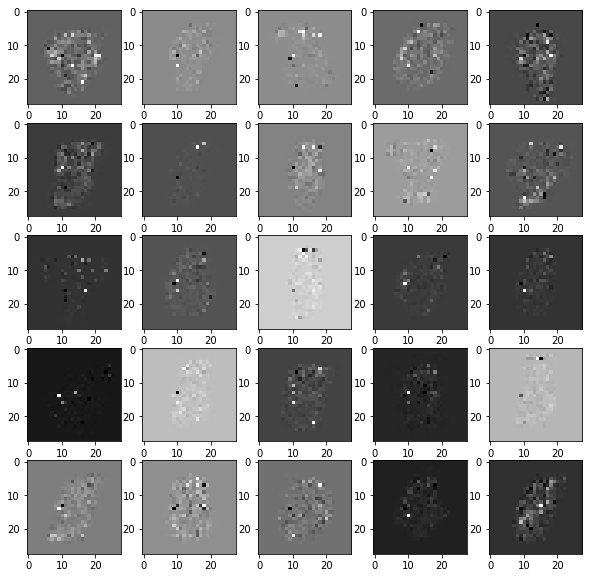

In [98]:
plot_test(model, train_images, n_test_plot, n_context)